# Requirements

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [4]:
data = pd.read_csv('./data/amazon_stock_price.csv')

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [5]:
data.head(10)

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
5,1997-05-22,0.0719,0.0724,0.0656,0.0698,235536000
6,1997-05-23,0.0703,0.0760,0.0667,0.0750,318744000
7,1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000
8,1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000
9,1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000


In [6]:
data.isnull().sum() / len(data) * 100

date      0.0
open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
dtype: float64

In [7]:
data = data.set_index('date')

In [8]:
data = data.sort_index()

In [9]:
data

,open,high,low,close,volume
date,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [10]:
lag = 7

In [11]:
columns = data.columns

In [131]:
for i in range(1, lag+1):
    data[f'close_prev_{i}'] = data["close"].shift(i)

In [12]:
for i in range(1, lag+1):
 for col in columns:
   data[f'{col}_prev_{i}'] = data[col].shift(i)

In [13]:
data = data.dropna(axis=0)

In [14]:
data

,open,high,low,close,volume,open_prev_1,high_prev_1,low_prev_1,close_prev_1,volume_prev_1,...,open_prev_6,high_prev_6,low_prev_6,close_prev_6,volume_prev_6,open_prev_7,high_prev_7,low_prev_7,close_prev_7,volume_prev_7
date,,,,,,,,,,,,,,,,,,,,,
1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000,0.0703,0.0760,0.0667,0.0750,318744000.0,...,0.0984,0.0990,0.0854,0.0865,294000000.0,0.1219,0.1250,0.0964,0.0979,1.443120e+09
1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000,0.0755,0.0823,0.0729,0.0792,173952000.0,...,0.0880,0.0885,0.0812,0.0854,122136000.0,0.0984,0.0990,0.0854,0.0865,2.940000e+08
1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000,0.0812,0.0818,0.0766,0.0766,91488000.0,...,0.0865,0.0875,0.0818,0.0818,109344000.0,0.0880,0.0885,0.0812,0.0854,1.221360e+08
1997-05-30,0.0750,0.0755,0.0740,0.0750,51888000,0.0771,0.0771,0.0740,0.0753,69456000.0,...,0.0818,0.0823,0.0688,0.0714,377064000.0,0.0865,0.0875,0.0818,0.0818,1.093440e+08
1997-06-02,0.0755,0.0766,0.0750,0.0755,11832000,0.0750,0.0755,0.0740,0.0750,51888000.0,...,0.0719,0.0724,0.0656,0.0698,235536000.0,0.0818,0.0823,0.0688,0.0714,3.770640e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000,147.8500,148.5400,145.9700,146.3200,40610900.0,...,143.9100,144.0500,141.5000,143.9000,71226000.0,145.1300,146.6300,144.7300,146.1300,4.195120e+07
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600,144.7600,146.9300,144.3300,146.0900,65814000.0,...,144.5700,147.7400,144.5700,146.7100,45669100.0,143.9100,144.0500,141.5000,143.9000,7.122600e+07
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200,146.0000,147.2500,145.5500,147.0300,39924600.0,...,146.7000,147.2000,145.3200,146.7400,22378400.0,144.5700,147.7400,144.5700,146.7100,4.566910e+07


In [16]:
# features = [f'close_prev_{i}' for i in range(1, lag + 1)]
# features

['close_prev_1',
 'close_prev_2',
 'close_prev_3',
 'close_prev_4',
 'close_prev_5',
 'close_prev_6',
 'close_prev_7']

In [17]:
features = data.columns.drop(['open',	'high',	'low',	'close',	'volume'])

In [18]:
features

Index(['open_prev_1', 'high_prev_1', 'low_prev_1', 'close_prev_1',
       'volume_prev_1', 'open_prev_2', 'high_prev_2', 'low_prev_2',
       'close_prev_2', 'volume_prev_2', 'open_prev_3', 'high_prev_3',
       'low_prev_3', 'close_prev_3', 'volume_prev_3', 'open_prev_4',
       'high_prev_4', 'low_prev_4', 'close_prev_4', 'volume_prev_4',
       'open_prev_5', 'high_prev_5', 'low_prev_5', 'close_prev_5',
       'volume_prev_5', 'open_prev_6', 'high_prev_6', 'low_prev_6',
       'close_prev_6', 'volume_prev_6', 'open_prev_7', 'high_prev_7',
       'low_prev_7', 'close_prev_7', 'volume_prev_7'],
      dtype='object')

In [19]:
X, Y = data[features], data['close']

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [138]:
# scaler = MinMaxScaler()

In [139]:
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

## Ensemble Learning Methods

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf_model = RandomForestRegressor(max_depth=10, criterion='squared_error', random_state=42)

In [26]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, random_state=42)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [27]:
Y_pred_rf = rf_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [28]:
# Write your code here. Add as many boxes as you need.

In [29]:
mae = mean_absolute_error(Y_test, Y_pred_rf)
mse = mean_squared_error(Y_test, Y_pred_rf)
r2 = r2_score(Y_test, Y_pred_rf)

In [38]:
from matplotlib import pyplot as plt

In [30]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 32.0190792136762
Mean Squared Error (MSE): 1873.6506635972582
R^2 Score: -0.841577399994214


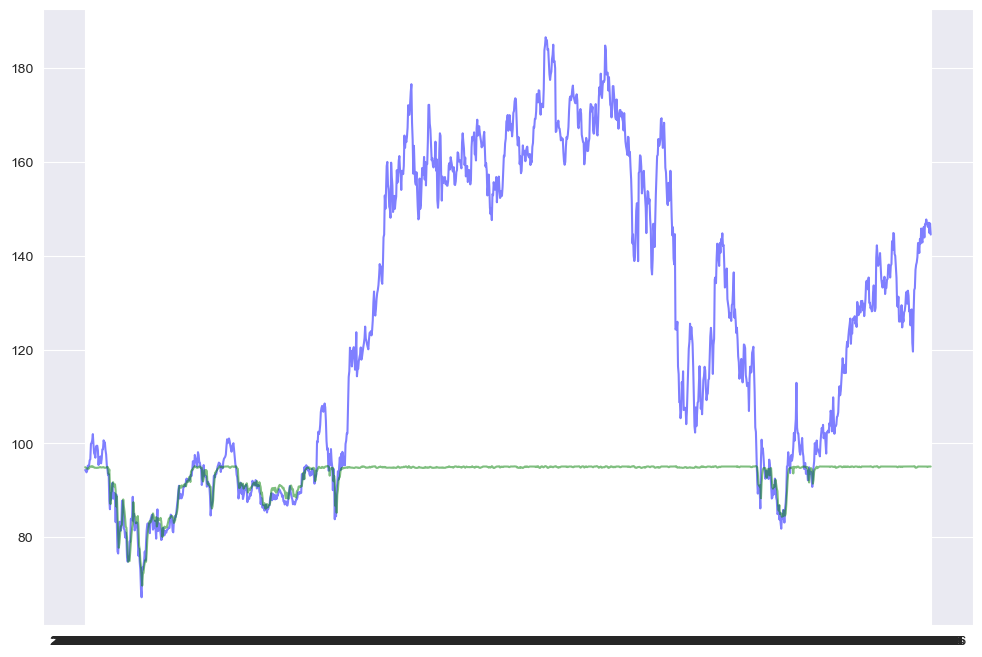

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(Y_test, color = 'blue', label = 'Actual',alpha = 0.5)
plt.plot(Y_pred_rf, color = 'green', label = 'Predicted', alpha = 0.5)
plt.show()

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [31]:
from xgboost import XGBRegressor

In [32]:
xgb_model = XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [33]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
Y_pred_xgb = xgb_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [35]:
mae = mean_absolute_error(Y_test, Y_pred_xgb)
mse = mean_squared_error(Y_test, Y_pred_xgb)
r2 = r2_score(Y_test, Y_pred_xgb)

In [36]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 33.186699907953866
Mean Squared Error (MSE): 1961.7483186532352
R^2 Score: -0.9281669941462465


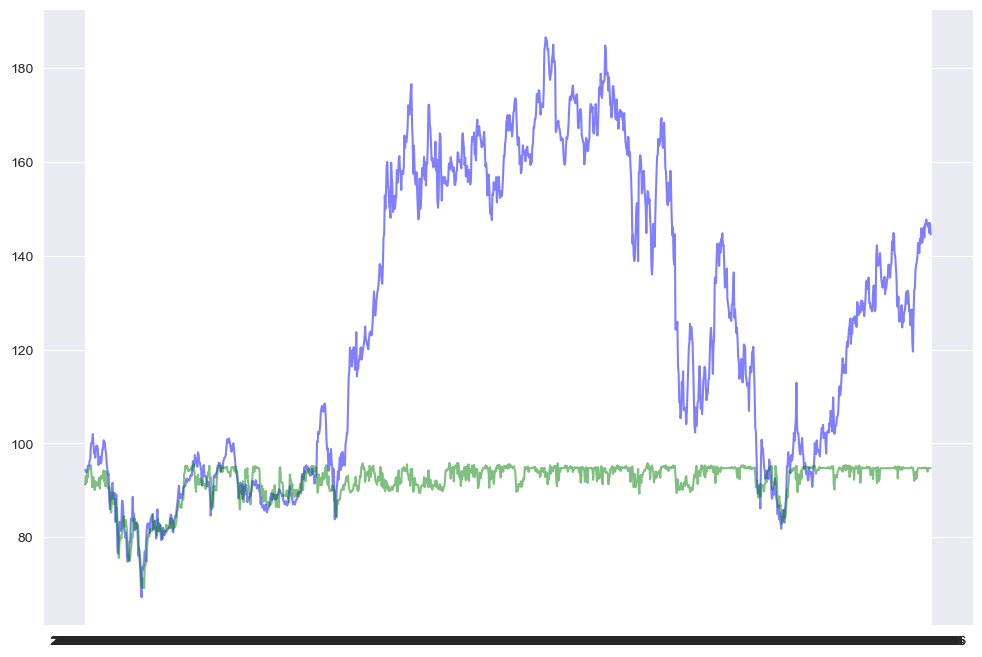

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(Y_test, color = 'blue', label = 'Actual',alpha = 0.5)
plt.plot(Y_pred_xgb, color = 'green', label = 'Predicted', alpha = 0.5)
plt.show()

:(